# Odszumianie obrazów za pomocą transformaty Fouriera

## Odszumiwanie obrazu szarego

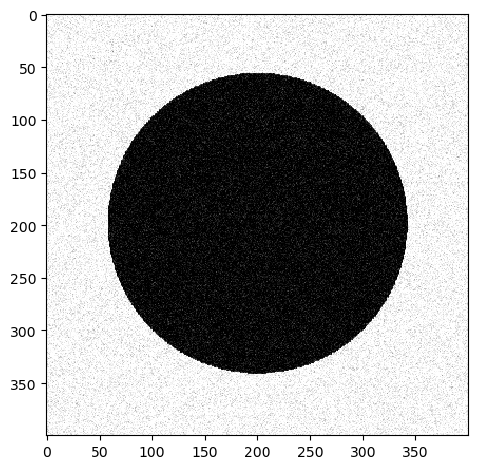

In [281]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, fftpack
from skimage import io

image = io.imread('./data/circle-noised.png')
io.imshow(image)

### Transformacja do przestrzeni szumów

Text(0.5, 1.0, 'Fourier transform')

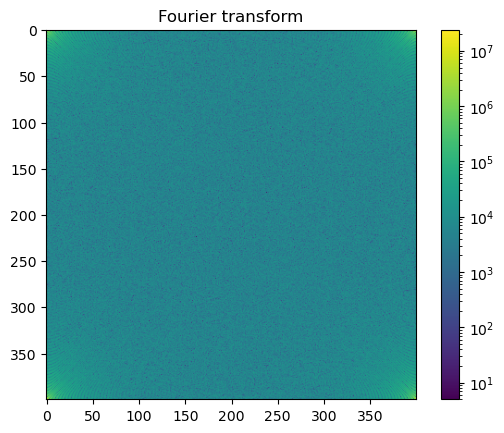

In [282]:
image_fft = fftpack.fftn(image)
# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(image_fft)
plt.title('Fourier transform')


### Usuwanie wysokich szumów

Text(0.5, 1.0, 'Spectrum')

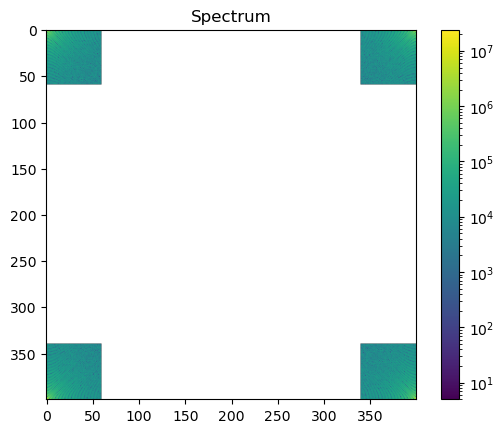

In [283]:
keep = 0.15
image_fft2 = image_fft.copy()
r, c = image_fft2.shape
image_fft2[int(r * keep):int(r * (1 - keep))] = 0
image_fft2[:, int(c * keep):int(c * (1 - keep))] = 0

plt.figure()
plot_spectrum(image_fft2)
plt.title("Spectrum")

### Nowy obraz

Po użyciu transformaty Fouriera, niskie częstotliwosci są zachowywane a wysokie są usuwane. Efektem jest obraz z mniejszą iloscią szczegółów oraz zredukowanym szumem.

Text(0.5, 1.0, 'New image')

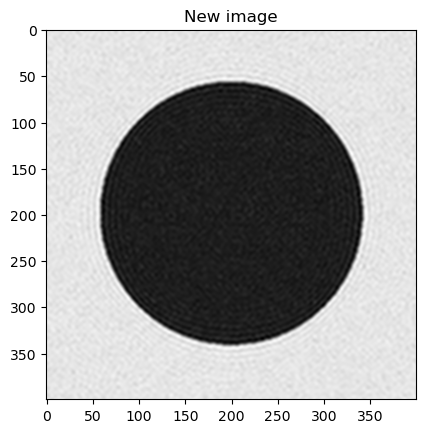

In [284]:
image_new = fftpack.ifftn(image_fft2).real
plt.figure()
plt.imshow(image_new, plt.cm.gray)
plt.title("New image")

## Usuwanie szumów ze zdjęcia kolorowego

Przy usuwaniu szumów ze zdjęcia kolorowego musimy wykonać te same kroki co przy usuwaniu szumów ze zdjęcia szarego. Musimy jedynie pamiętać o powtórzeniu całego procesu dla każdego kanału, których mamy 3 w przypadku obrazów kolorowych.

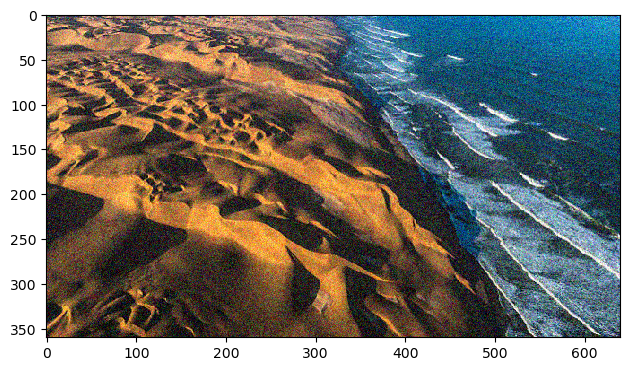

In [285]:
im = io.imread('./data/namib-noised.png')
io.imshow(im)
io.show()

### Transformacja do przestrzeni szumów

Text(0.5, 1.0, 'Fourier transform')

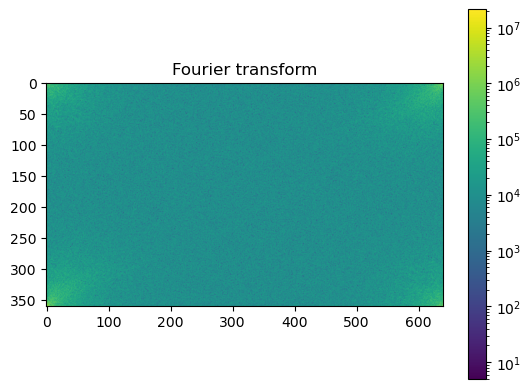

In [286]:
im_fft = np.zeros_like(im, np.complex64)
for k in range(3):
    im_fft[:, :, k] = fftpack.fft2(im[:, :, k])
    
# Show the results
plt.figure()
plot_spectrum(im_fft[:, :, 0])
plt.title('Fourier transform')

### Usuwanie wysokich szumów

Text(0.5, 1.0, 'Spectrum')

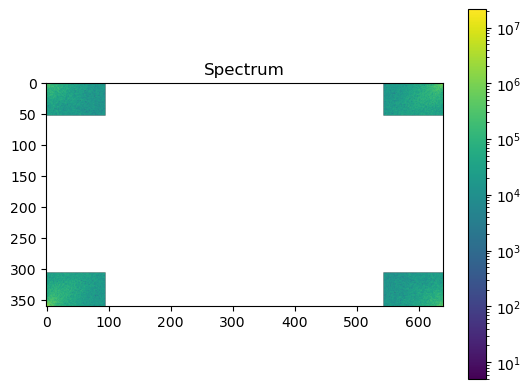

In [287]:
im_fft2 = im_fft.copy()
keep = 0.15
for k in range(3):
    r, c = im_fft2[:, :, k].shape
    im_fft2[int(r * keep):int(r * (1 - keep)), :, k] = 0
    im_fft2[:, int(c * keep):int(c * (1 - keep)), k] = 0

plt.figure()
plot_spectrum(im_fft2[:, :, 0])
plt.title("Spectrum")

### Nowy obraz

Text(0.5, 1.0, 'New image')

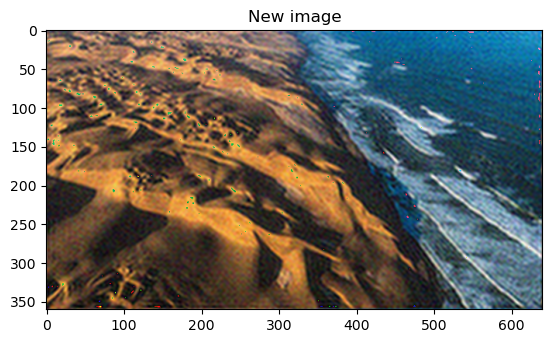

In [288]:
im_new = np.zeros_like(im, np.uint8)
for k in range(3):
    im_new[:, :, k] = fftpack.ifft2(im_fft2[:, :, k]).real

im_new.clip(0, 255).astype(np.uint8)
plt.figure()
plt.imshow(im_new)
plt.title("New image")